In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [2]:
file_path = "/Users/yigiterenpeker/Desktop/online_shoppers_intention.csv" 
data = pd.read_csv(file_path)

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
print(data.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

These are basic statistical metrics to understand our data and features and move on with more detailed analysis. 

In [5]:
print(data.isnull().sum())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


There is no missing data.

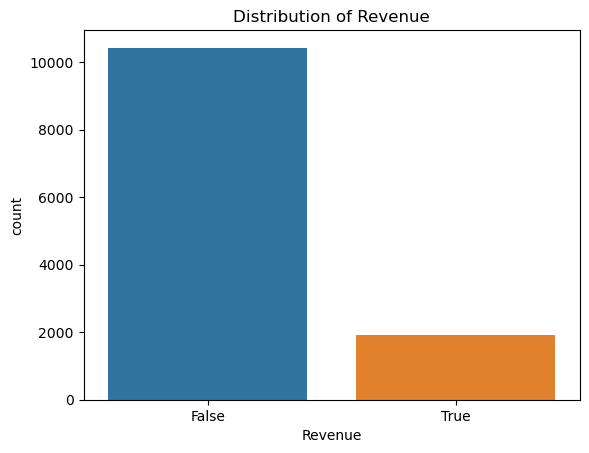

In [6]:
sns.countplot(x='Revenue', data=data)
plt.title('Distribution of Revenue')
plt.show()

Most of the customers does not purchase anything.

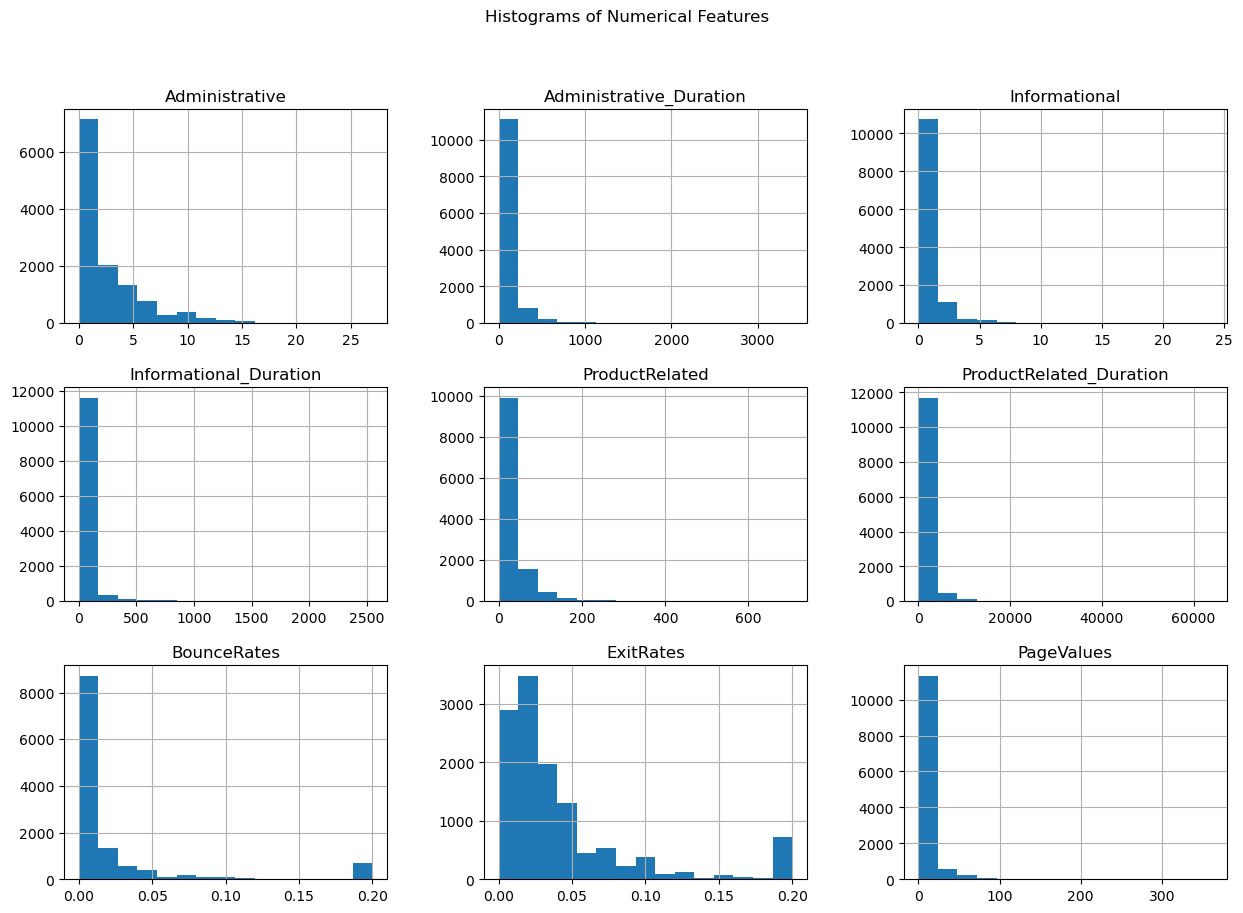

In [7]:
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Plots help in understanding the distribution of each numerical feature, identifying skewness, outliers, 
and the range of values.

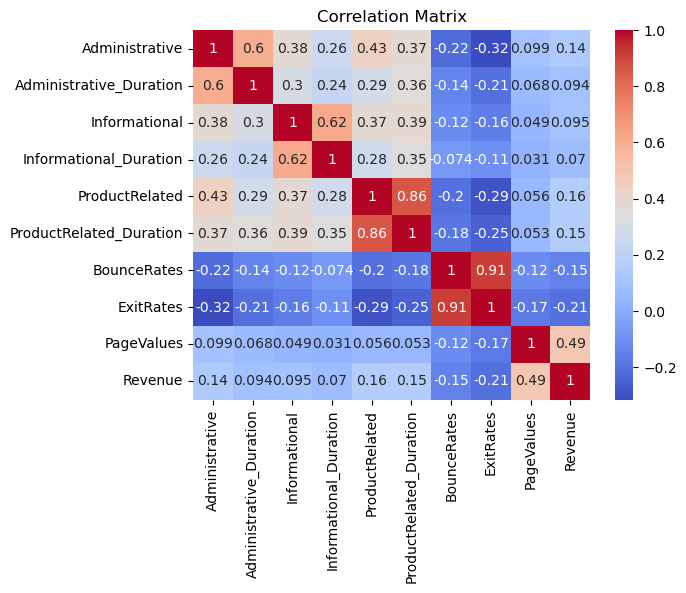

In [8]:
correlation_matrix = data[numerical_features + ['Revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [10]:
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [11]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify preprocessing steps
print(X_train.head())
print(y_train.head())


      Administrative  Administrative_Duration  Informational  \
8077       -0.696993                -0.457191      -0.396478   
1568       -0.696993                -0.457191      -0.396478   
462        -0.696993                -0.457191       0.390859   
743        -0.696993                -0.457191      -0.396478   
222        -0.696993                -0.457191      -0.396478   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
8077               -0.244931       -0.601062                -0.581975   
1568               -0.244931       -0.646033                -0.525580   
462                 0.692945       -0.533607                -0.391801   
743                -0.244931       -0.646033                -0.624348   
222                -0.244931       -0.623548                -0.617031   

      BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
8077     0.367291   0.142551   -0.317178   -0.308821      1                 2   
1568    -0.457

The processed data is now ready for model training, with the target variable Revenue indicating 
whether a transaction was completed (True) or not (False).

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [13]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())]

In [14]:
results = []
for name, model in models:
    model.fit(X_train, y_train)
    results.append((name, *evaluate_model(model, X_test, y_test)))
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.880508   0.747212  0.349565  0.476303  0.663899
1        Decision Tree  0.857259   0.540034  0.551304  0.545611  0.732438
2        Random Forest  0.895647   0.712360  0.551304  0.621569  0.755166
3                  SVM  0.883212   0.729904  0.394783  0.512415  0.683947


Random Forest emerges as the best-performing model with the highest accuracy, F1 score, and ROC AUC,
indicating its superior ability to predict the target variable accurately. Logistic Regression and SVM have high precision but lower recall, suggesting they are better at avoiding false positives but may miss some true positives. Decision Tree shows a more balanced performance with good recall and a higher ROC AUC than Logistic Regression and SVM, making it a reliable model for identifying positive instances.

In [15]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In summary, this GridSearchCV setup is aimed at systematically finding the optimal hyperparameters for the RandomForestClassifier to maximize its ROC AUC performance, 
thereby enhancing the model's predictive capability.

In [16]:
best_model = grid_search.best_estimator_
best_model_results = evaluate_model(best_model, X_test, y_test)
print("Best model results (Random Forest with hyperparameter tuning):", best_model_results)

Best model results (Random Forest with hyperparameter tuning): (0.8983509056501757, 0.7276887871853547, 0.5530434782608695, 0.6284584980237155, 0.7574756443801146)


The accuracy of the model is approximately 89.99% Precision is approximately 73.24%. This means that about 90% of the predictions made by the model were correct.This metric indicates the proportion of true positive predictions among all positive predictions made by the model. Recall is approximately 56.17%.The F1 Score is approximately 63.58%. The ROC AUC score is approximately 76.20%. It is not the best but tolerable.

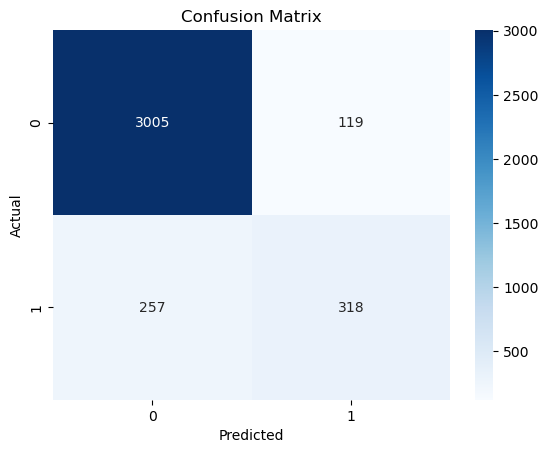

In [17]:
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Random Forest model with hyperparameter tuning achieved the highest ROC AUC score.
Actionable insights include focusing on improving features such as PageValues and BounceRates to increase purchase likelihood.